**Полезные ссылки:**

**sts:** [*scipy.stats.triang*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html) ---> [*scipy.stats.lomax*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lomax.html)

**latex:** [Detect latex](http://detexify.kirelabs.org/classify.html) и [Кратко о latex (Youtube)](https://www.youtube.com/watch?v=vSc25kdgecg)

# Задание 1

**0.** В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

**1.** Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 

**Я выбрал Распределение Парето. Оно заметно отличается от нормального<br>**
Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других[1]. Вне области экономики иногда называется также распределением Брэдфорда [Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE).

$f(x, b) =\frac {b} { x^{b+1}}$, для $ x \geq 1, b > 0 $

In [2]:
# импорт библиотек
from scipy.stats import pareto, norm
import matplotlib.pyplot as plt
import numpy as np

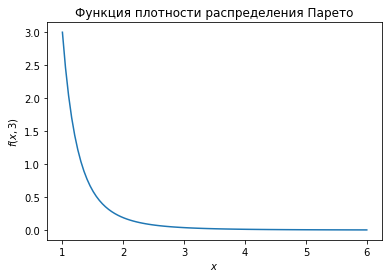

In [3]:
# возьму значение b из примера библиотеки scipy
b = 3
x = np.linspace(1., 6., 100)
plt.plot(x, pareto.pdf(x, b), label='pareto pdf')
plt.title('Функция плотности распределения Парето')
plt.ylabel('$f (x, {})$'.format(b)) # Метка по оси y в формате TeX
plt.xlabel('$x$');

**2.** Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Min value of sample 1.0, max value: 11.411


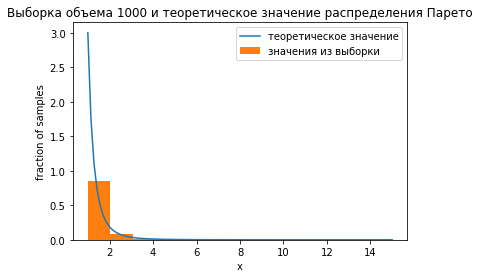

In [4]:
sample = pareto.rvs(b, size=1000)
print('Min value of sample %.1f, max value: %.3f' % (sample.min(), sample.max()))
x = np.linspace(1., 15., 100)
plt.plot(x, pareto.pdf(x, b), label='теоретическое значение')
# !!! normed is deprecated, I use density instead of it
plt.hist(sample, density=True, label='значения из выборки') 
plt.title('Выборка объема 1000 и теоретическое значение распределения Парето')
plt.ylabel('fraction of samples')
plt.xlabel('x')
plt.legend();

**3.** Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

**4.** Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 
*Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).*

$E(x) = \frac {kx_m}{k-1}$, если $k>1$

$D(x) = \left({\frac {x_m}{k-1}}\right)^{2}{\frac {k}{k-2}}$ при $k>2$

In [5]:
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
mean, var #среднее и дисперсия

(array(1.5), array(0.75))

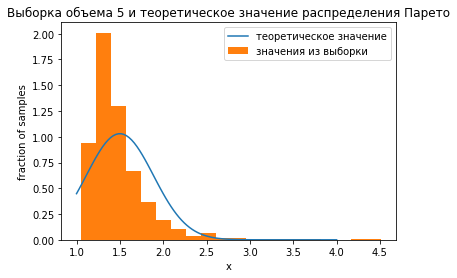

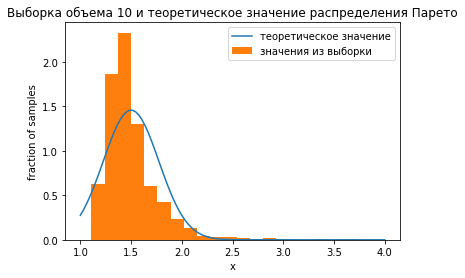

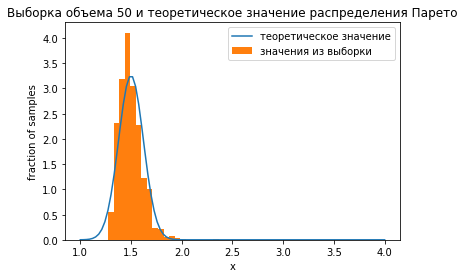

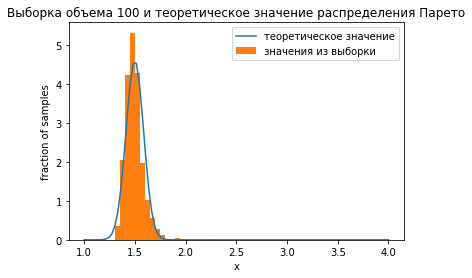

In [6]:
for n in [5, 10, 50, 100]:
  sample = [np.mean(pareto.rvs(b, size=n)) for _ in range(1000)]
  norm_rv = norm(loc=mean, scale=(var/n)**0.5 )
  fig, ax = plt.subplots(1, 1)
  x = np.linspace(1., 4., 100)
  plt.plot(x, norm_rv.pdf(x), label='теоретическое значение')
  plt.hist(sample, density=True, label='значения из выборки', bins=20) #!!!normed is deprecated, I use density instead of it
  plt.title('Выборка объема {} и теоретическое значение распределения Парето'.format(n))
  plt.ylabel('fraction of samples')
  plt.xlabel('x')
  plt.legend()
  plt.plot()

**5.** Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

**C увеличением объема выборки распределение выборочных средних все лучше и лучше аппроксимируется нормальным распределнием.**